In [2]:
import seaborn as sns
import pandas as pd

In [4]:
data = pd.read_csv("salary.csv")

In [6]:
data.head()

,Experience,Salary
0,1,10000
1,2,15000
2,3,18000
3,4,21000
4,5,24000


In [10]:
corr = data.corr()["Salary"].sort_values(ascending = False)

In [12]:
corr

Salary        1.000000
Experience    0.997082
Name: Salary, dtype: float64

In [14]:
corr_matrix = data.corr()

<Axes: >

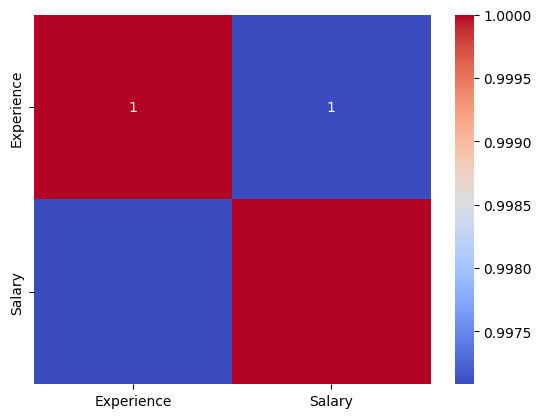

In [18]:
sns.heatmap(corr_matrix , cmap = "coolwarm" , annot = True)

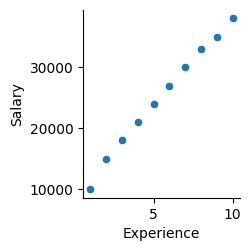

In [22]:
sns.pairplot(data , x_vars = data.columns.drop("Salary") , y_vars = "Salary")

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
x = data.drop(columns = "Salary")

In [28]:
y = data["Salary"]

In [30]:
rand = RandomForestRegressor()

In [32]:
rand.fit(x,y)

RandomForestRegressor()

In [44]:
f_imp = pd.Series(rand.feature_importances_ , index = x.columns).sort_values(ascending = False)

<Axes: >

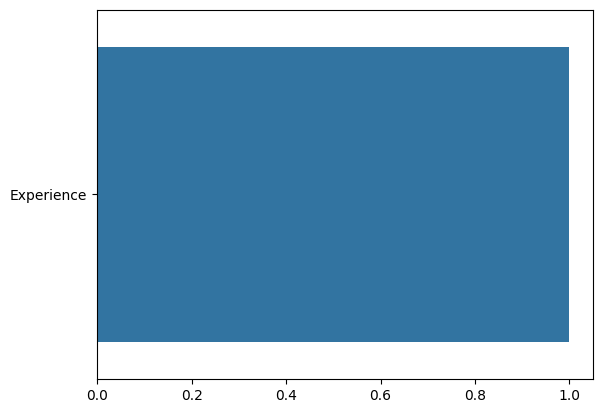

In [46]:
sns.barplot(x = f_imp.values , y = f_imp.index)

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()

In [54]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.25 , random_state = 42)

In [58]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred = lr.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error , r2_score

In [64]:
mse = mean_squared_error(y_test , y_pred)

In [66]:
r2 = r2_score(y_test , y_pred)

In [68]:
print(f"mean squared error =  {mse:.2f}")

mean squared error =  438592.62


In [70]:
print(f"r^2 value =  {r2:.2f}")

r^2 value =  0.99


In [72]:
print(f"intercept value = {lr.intercept_:.2f}")

intercept value = 8168.32


In [76]:
print(f"coefficient = {lr.coef_[0]:.2f}")

coefficient = 3074.26
